Deep Learning model for detection of Early stages of Diabetes

Importing data

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/diabetes_data_upload.csv')
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


Checking the missing values

In [ ]:
data.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


Checking for inconsistencies

In [ ]:
for column in data.columns:
  unique_values = data[column].unique()
  print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Age': [40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]
Unique values in column 'Gender': ['Male' 'Female']
Unique values in column 'Polyuria': ['No' 'Yes']
Unique values in column 'Polydipsia': ['Yes' 'No']
Unique values in column 'sudden weight loss': ['No' 'Yes']
Unique values in column 'weakness': ['Yes' 'No']
Unique values in column 'Polyphagia': ['No' 'Yes']
Unique values in column 'Genital thrush': ['No' 'Yes']
Unique values in column 'visual blurring': ['No' 'Yes']
Unique values in column 'Itching': ['Yes' 'No']
Unique values in column 'Irritability': ['No' 'Yes']
Unique values in column 'delayed healing': ['Yes' 'No']
Unique values in column 'partial paresis': ['No' 'Yes']
Unique values in column 'muscle stiffness': ['Yes' 'No']
Unique values in column 'Alopecia': ['Yes' 'No']
Unique values in column 'Obesity': ['Yes' 'No']
Unique values in column

Separating data to dependent and independent

In [ ]:
X = data.drop('class', axis=1)
y = data['class']

print(X.shape)
print(y.value_counts())

(520, 16)
class
Positive    320
Negative    200
Name: count, dtype: int64


Preprocessing and data splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#Differentiating categorical columns and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns
print(cat_cols)
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)

#preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output= False), cat_cols),
        ('num', StandardScaler(), num_cols)
    ])

X_prepocessed = preprocessor.fit_transform(X)
#Encode class
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply train-test split to the preprocessed data
X_train, X_test, y_train, y_test = train_test_split(X_prepocessed, y, test_size=0.2, random_state=42)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')
Index(['Age'], dtype='object')


Building a deep learning model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


#Building the model
model = keras.Sequential([
layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
layers.Dropout(0.3),
layers.Dense(32, activation='relu'),
layers.Dropout(0.3),
layers.Dense(1, activation='sigmoid'),
])

#Compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy']
              )
#Defining early_stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

None


Training the model

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - binary_accuracy: 0.5861 - loss: 0.6702 - val_binary_accuracy: 0.7738 - val_loss: 0.5914
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.5885 - loss: 0.6415 - val_binary_accuracy: 0.7976 - val_loss: 0.5296
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.7382 - loss: 0.5614 - val_binary_accuracy: 0.8214 - val_loss: 0.4767
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - binary_accuracy: 0.7224 - loss: 0.5210 - val_binary_accuracy: 0.8929 - val_loss: 0.4233
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - binary_accuracy: 0.7994 - loss: 0.4764 - val_binary_accuracy: 0.9286 - val_loss: 0.3722
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - binary_accuracy: 0.8663 - loss: 0.4095 - val_binary_accuracy: 0.9524 - val_loss: 0.3256
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.8988 - loss: 0.3592 - val_binary_accuracy: 0.9524 - val_loss: 0.2859
Epoch 8

Evaluating the model

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.99      0.99      0.99        71

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104

AUC-ROC: 0.9996
Accuracy: 0.9807692307692307
Precision: 0.9859154929577465
Recall: 0.9859154929577465
F1-score: 0.9859154929577465
[[32  1]
 [ 1 70]]


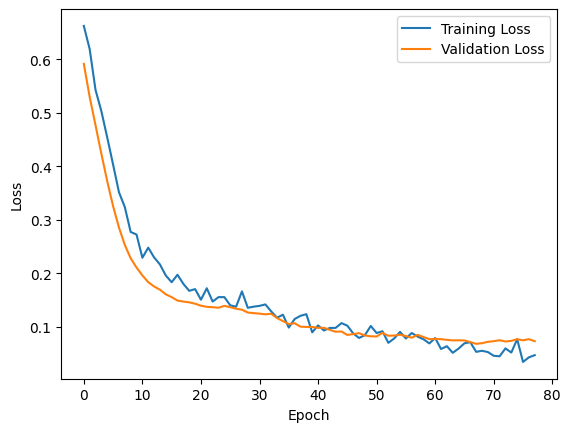

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
y_pred_proba = model.predict(X_test).flatten()

#Metrics
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-score: {f1_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))

#Plot history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Saving the model

In [ ]:
model.save('My_model.keras')